In [1]:
# Patricia Hurlocker
# Homework - Pandas/MatPlotlib solution for pyUBER problem

In [2]:
%matplotlib inline

In [3]:
# 1. Import the Library Dependencies for Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

In [4]:
# 2. CSV files to File to Load (Remember to change these)
        # old-city_data_to_load = "data/city_data.csv"
city_data = "data/city_data.csv"
        # old-ride_data_to_load = "data/ride_data.csv"
ride_data = "data/ride_data.csv"


In [5]:
# 3. Read the City Data and create a pandas dataframe
city_data_df = pd.read_csv(city_data)
city_data_df.head()


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [6]:
# 4. Look for duplicates (be sure there are no duplicates in city_data) drop any duplicates
city_data_df = city_data_df.drop_duplicates('city')
city_data_df.head()


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [7]:
# 5. Read the Ride Data and create a pandas dataframe
ride_data_df = pd.read_csv(ride_data)
ride_data_df.head()


,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [8]:
# 6. Merge the new City and Ride dataframes into one combined dataframe on the common column = 'city'
# 7. Display the new data table for preview
pyUBER_data = pd.merge(city_data_df, ride_data_df, on="city")
pyUBER_data.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [9]:
# Complete the work to obtain information for plots

In [10]:
# 8 Find the average fare per city (groupBy city and find the mean).
average_fare = pyUBER_data.groupby("city")["fare"].mean()
average_fare.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [11]:
# 9. Find the total rides per city (groupBy city and count the unique ride_id).
total_rides = pyUBER_data.groupby("city")["ride_id"].count()
total_rides.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [12]:
# 10. Find the total number of drivers per city. (groupBy city and find the mean using driver_count)
total_drivers = pyUBER_data.groupby("city")["driver_count"].mean()
total_drivers.head()

city
Amandaburgh      12
Barajasview      26
Barronchester    11
Bethanyland      22
Bradshawfurt      7
Name: driver_count, dtype: int64

In [13]:
# 11. Create a variable called city_type and set and index on the column city by Find the 
city_type = city_data_df.set_index('city')['type']
city_type.head()

city
Richardfort     Urban
Williamsstad    Urban
Port Angela     Urban
Rodneyfort      Urban
West Robert     Urban
Name: type, dtype: object

In [14]:
# 12. Count the city by types
city_type.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [15]:
# 13. Create a new pyUBER cities data frame to hold the work above (average fare, total rides, total drivers, city type)
pyUBER_cities = pd.DataFrame({
                 "Average Fare per City":average_fare,
                 "Number of Rides": total_rides,
                 "Number of Drivers": total_drivers,
                 "City Type": city_type})
pyUBER_cities.head()

,Average Fare per City,Number of Rides,Number of Drivers,City Type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


In [16]:
# 14. Urban - use the loc function to carve out Suburban cities data
Urban = pyUBER_cities.loc[pyUBER_cities["City Type"] == "Urban"]
Urban.head()

,Average Fare per City,Number of Rides,Number of Drivers,City Type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Carriemouth,28.314444,27,52,Urban
Christopherfurt,24.501852,27,41,Urban
Deanville,25.842632,19,49,Urban


In [17]:
# 15. Suburban - use the loc function to carve out Suburban cities data
Suburban = pyUBER_cities.loc[pyUBER_cities["City Type"] == "Suburban"]
Suburban.head()

,Average Fare per City,Number of Rides,Number of Drivers,City Type
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Brandonfort,35.437368,19,10,Suburban
Colemanland,30.894545,22,23,Suburban
Davidfurt,31.995882,17,23,Suburban


In [18]:
# 16. Rural -  use the loc function to carve out Rural cities data
Rural = pyUBER_cities.loc[pyUBER_cities["City Type"] == "Rural"]
Rural.head()

,Average Fare per City,Number of Rides,Number of Drivers,City Type
Bradshawfurt,40.064000,10,7,Rural
Garzaport,24.123333,3,7,Rural
Harringtonfort,33.470000,6,4,Rural
Jessicaport,36.013333,6,1,Rural
Lake Jamie,34.358333,6,4,Rural


## Bubble Plot of Ride Sharing Data

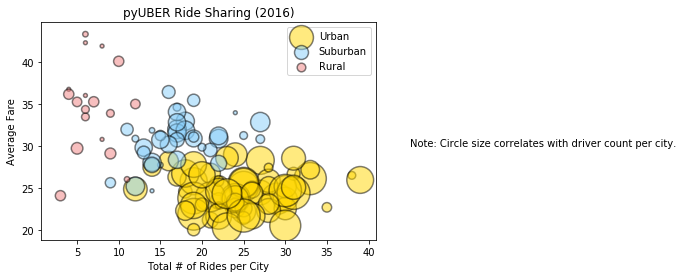

In [19]:
# 17. Bubble Plot of Ride Sharing Data
    #Obtain the x and y coordinates for each of the three city types
    #Build the scatter plots for each city types
    # Urban
plt.scatter(Urban["Number of Rides"], Urban["Average Fare per City"], 
            color = "gold", edgecolors="black", s = Urban["Number of Drivers"]*15, 
            label = "Urban", alpha = 0.5, linewidth = 1.5)
    # Suburban
plt.scatter(Suburban["Number of Rides"], Suburban["Average Fare per City"], 
            color = "lightskyblue", edgecolors ="black", s = Suburban["Number of Drivers"]*15, 
            label = "Suburban", alpha = 0.5, linewidth = 1.5)
    # Rural
plt.scatter(Rural["Number of Rides"], Rural["Average Fare per City"], 
            color = "lightcoral", edgecolors = "black", s = Rural["Number of Drivers"]*15, 
            label = "Rural", alpha = 0.5, linewidth = 1.5)


# Add title, x axis label and y axis label.
plt.title("pyUBER Ride Sharing (2016)") 
plt.xlabel("Total # of Rides per City") 
plt.ylabel("Average Fare")

# Create and place the legend in the upper right.
plt.legend(['Urban', 'Suburban', 'Rural'], loc="upper right") 

# Create and place the Note: to the right of the plot image
plt.text(45, 30,"Note: Circle size correlates with driver count per city.")
plt.show()

In [20]:
# 18. Save Figure an image of the bubble chart and print the final product to the screen
plt.savefig("Images/Bubble_plt_2016_ride_share_data_with_labels.png")


<Figure size 432x288 with 0 Axes>

## Total Fares by City Type

In [21]:
# 19. Create a variable for groupBy sum of fares by city type.
city_fare_pie = pyUBER_data.groupby(["type"])["fare"].sum()
city_fare_pie

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [22]:
# 20. Create pie wedge labels using index.
city_fare_pie.index


Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

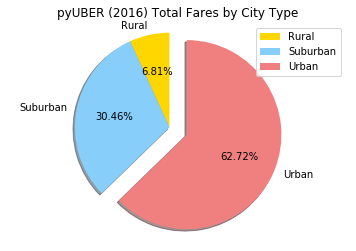

In [23]:
# 21. Build Pie Chart
# Declare the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

# Explode the first section of the pie chart.
explode = (0,0,0.2)

# PLOT the pie chart.
plt.pie(city_fare_pie, labels = city_fare_pie.index, 
        autopct ="%1.2f%%", colors = colors, explode = explode, 
        shadow = True, startangle = 90)

# Create pie chart with equal axies.
plt.axis("equal")
# Add the legend.
plt.legend(loc = "best")
# Add the title of Pie Chart
plt.title("pyUBER (2016) Total Fares by City Type") 
# Show the chart.
plt.show()


In [24]:
# 22. Save Figure of an image of the pie chart
plt.savefig("Images/Pie_Cht_2016_pyUBER_tot_fares-x-city_type.png")

<Figure size 432x288 with 0 Axes>

## Total Rides by City Type

In [25]:
# 23. Declare the variable and use groupBy to count the Total rides by ride ID.
city_rides_pie = pyUBER_data.groupby(["type"])["ride_id"].count()
city_rides_pie

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

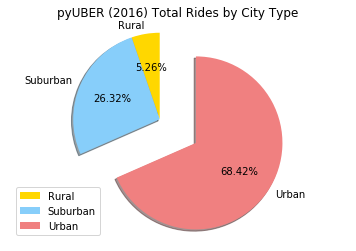

In [26]:
# 24. Declare the variable for the City Rides index for wedge labels.
city_rides_pie.index

# Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

# Explode the first section of the pie chart.
explode = (0,0,0.5)

# Create the pie chart.
plt.pie(city_rides_pie, labels = city_fare_pie.index, 
        autopct = "%1.2f%%", colors = colors, explode = explode, 
        shadow = True, startangle = 90)

# Set the Matplotlib pie chart to have equal axes.
plt.axis("equal")

# Add a legend.
plt.legend(loc = "best")

# Add the title of Pie Chart
plt.title("pyUBER (2016) Total Rides by City Type") 

#Show the chart.
plt.show()


In [27]:
# 25. Save Figure of an image of the pie chart
plt.savefig("Images/Pie_Cht_2016_pyUBER_tot_rides-x-city_type.png")

<Figure size 432x288 with 0 Axes>

## Total Drivers by City Type

In [28]:
# 26. Declare the variable and count the total rides by city type.
city_rides_pie = pyUBER_data.groupby(["type"])["ride_id"].count()
city_rides_pie

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

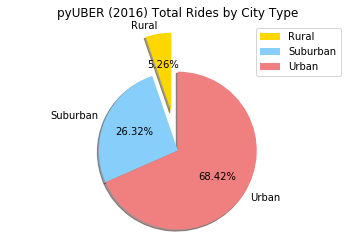

In [29]:
# 27. Utilize the City Pie index for wedge labels.
city_rides_pie.index

# Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

# Explode the first section of the pie chart.
explode = (0.5,0,0)

# Create the pie chart.
plt.pie(city_rides_pie, labels = city_fare_pie.index, 
        autopct = "%1.2f%%", colors = colors, explode = explode, 
        shadow = True, startangle = 90)

# Tell Matplotlib that we wnat the pie chart to have equal axes.
plt.axis("equal")

# Add the legend 
plt.legend(loc = "upper right")

# Add the title of Pie Chart
plt.title("pyUBER (2016) Total Rides by City Type") 

#Show the chart.
plt.show()

In [30]:
# 28. Save Figure of an image of the pie chart
plt.savefig("Images/Pie_Cht_2016_pyUBER_tot_rides-x-city_type.png")

<Figure size 432x288 with 0 Axes>

In [31]:
# 29. Declare the variable for the mean of the Total driver count.
city_drivers_pie = pyUBER_data.groupby(["type"])["driver_count"].mean()
city_drivers_pie

type
Rural        4.296000
Suburban    13.712000
Urban       36.678154
Name: driver_count, dtype: float64

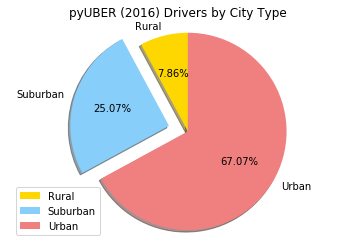

In [32]:
# 30. Utilize the City Pie Drivers index for the wedge labels.
city_drivers_pie.index

# Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

# explode second segment of the pie chart.
explode = (0,0.2,0)

# Create the pie chart.
plt.pie(city_drivers_pie, labels = city_fare_pie.index, 
        autopct = "%1.2f%%", colors = colors, explode = explode, 
        shadow = True, startangle = 90)

# Set the chart to have equal axes.
plt.axis("equal")

# Add a legend.
plt.legend(loc = "best")

# Add the title of Pie Chart
plt.title("pyUBER (2016) Drivers by City Type") 

# Show the pie chart.
plt.show()

In [33]:
# 31. Save Figure of an image of the pie chart
plt.savefig("Images/Pie_Cht_2016_pyUBER_tot_drivers-x-city_type.png")

<Figure size 432x288 with 0 Axes>